# Course 2 Module 2
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Portugapt/LearnHub-Public/blob/main/Courses/Datacamp - Deep Learning with Python/C2M2 Tensorflow.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Portugapt/LearnHub-Public/blob/main/Courses/Datacamp - Deep Learning with Python/C2M2 Tensorflow.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt



# Import data

In [2]:
# Import pandas under the alias pd
import pandas as pd 

# Assign the path to a string variable named data_path
data_path = './data/kc_house_data.csv'

In [3]:
# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)


## Cast to type in numpy and tf

In [4]:
# Import numpy and tensorflow with their standard aliases
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


2021-11-15 16:16:46.652892: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loss Functions in TensorFlow

In [8]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions) #Or mae

# Print the mean squared error (mse)
print(loss.numpy())

NameError: name 'predictions' is not defined

# Linear Regression

In [5]:
def plot_results(intercept, slope):
  size_range = np.linspace(6,14,100)
  price_pred = [intercept+slope*s for s in size_range]
  plt.scatter(size_log, price_log, color = 'black')
  plt.plot(size_range, price_pred, linewidth=3.0, color='red')
  plt.xlabel('log(size)')
  plt.ylabel('log(price)')
  plt.title('Scatterplot of data and fitted regression line')
  plt.show()

In [6]:
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)

price_log = np.log(price)
size_log = np.log(size)

In [11]:
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [9]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + features*slope

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.91295
84.309006


62.8498
1.7102922
0.37475628
0.25834325
0.48245656
0.5604233
0.3782508
0.23990087
0.2400491
0.23684157


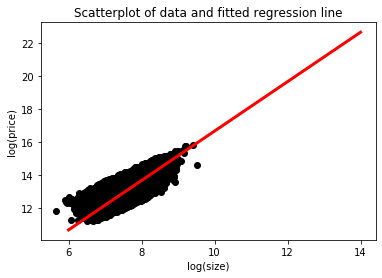

In [12]:
# Initialize an Adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

In [21]:
bedrooms = np.array(housing['bedrooms'], np.int32)
params = tf.Variable([0.1 , 0.05, 0.02], tf.float32)

def print_results(params):
  return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(
				loss_function(params).numpy(),
				params[0].numpy(),
				params[1].numpy(),
				params[2].numpy()))

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.491, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.479, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.467, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.455, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.443, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.431, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.419, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.408, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.396, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.384, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


# Batch Training

In [46]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

In [47]:
# Initialize Adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('./data/kc_house_data.csv', chunksize=100):
    
    size_batch = np.array(batch['sqft_lot'], np.float32)
	
    # Extract the price values for the current batch
    price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016


# Dense layers

In [ ]:
# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')

# Binary & Multiclass Classification

## Binary

In [ ]:
# Construct input layer from features
inputs = constant(bill_amounts)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

## Multiclass

In [ ]:
# Construct input layer from borrower features
inputs = constant(borrower_features, float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation ='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

# Optimizers

In [ ]:
# Initialize x_1 and x_2
x_1 = Variable(6.0,float32)
x_2 = Variable(0.3,float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

# Defining neural networks with Keras

In [ ]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Print the model architecture
print(model.summary())

In [ ]:
# Define the first dense layer
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4,activation='softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

## Le Merge

In [ ]:
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

Nice work! Notice that the .summary() method yields a new column: connected to. This column tells you how layers connect to each other within the network. We can see that dense_2, for instance, is connected to the input_2 layer. We can also see that the add layer, which merged the two models, connected to both dense_1 and dense_3.

In [ ]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Set the optimizer, loss function, and metrics
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Add the number of epochs and the validation split
model.fit(sign_language_features, sign_language_labels, epochs=10, validation_split=0.1)

In [ ]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(1024, activation='relu', input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels, epochs=50, validation_split=0.5)